# Customer Purchase Analysis Project

### Project Overview


This project aims to track and analyze customer purchases to identify the most valuable customers by calculating total sales per customer. By understanding customer behavior, we can gain insights into purchasing patterns and make data-driven decisions to enhance customer engagement and optimize marketing strategies.

## Project Objectives

- __Identify High-Value Customers:__ Calculate total sales per customer to determine which customers contribute the most to revenue.

- __Analyze Customer Behavior:__ Examine purchasing patterns, such as frequency of purchases, average purchase value, and product preferences.

- __Support Business Decisions:__ Use insights to tailor marketing efforts, improve customer retention, and enhance overall sales strategies.

## Steps to Build the Project

1. __Define the Project Scope and Objectives__
Outline the specific goals of the project, including identifying high-value customers and understanding their purchasing patterns. Set measurable objectives to guide the analysis.

2. __Design the Database Schema__
Create a detailed schema design, including key tables such as customers, purchases, and products. Define attributes for each table (e.g., customer ID, purchase date, product details) and establish relationships between them.

3. __Set Up the Database__
Choose an appropriate database management system (e.g., SQLite, MySQL). Create the database and tables according to the schema design. Populate the tables with sample data to test the setup.

4. __Load and Prepare Data__
Import customer and purchase data into the database. Ensure data quality by checking for missing values, duplicates, and errors. Prepare the data for analysis by cleaning and organizing it as needed.

5. __Write SQL Queries for Analysis__
Develop SQL queries to calculate total sales per customer and other metrics, such as purchase frequency and average purchase value. Use these queries to gather insights into customer behavior.

6. __Analyze the Results__
Run the queries and analyze the output to identify key insights, such as the top customers by total sales. Look for patterns or trends in customer purchases that can inform business strategies.

7. __Visualize the Data__
Use data visualization tools like in this case we will use matplotlib to create charts and graphs. Visualize key metrics such as sales distribution, top customers, and purchase trends over time.

In [62]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [37]:
# Create connection with server
engine = create_engine('sqlite:///purchase.db')

In [43]:
customers_df = pd.read_sql('SELECT * FROM customers', con = engine)
print(customers_df.head)

<bound method NDFrame.head of     customer_id  customer_name                email     phone  \
0             1       John Doe     john@example.com  555-1234   
1             2     Jane Smith     jane@example.com  555-5678   
2             3  Alice Johnson    alice@example.com  555-9101   
3             4      Bob Brown      bob@example.com  555-1122   
4             5  Charlie Davis  charlie@example.com  555-3344   
5             6    Diana Evans    diana@example.com  555-5566   
6             7    Evan Foster     evan@example.com  555-7788   
7             8    Fiona Green    fiona@example.com  555-9900   
8             9  George Harris   george@example.com  555-0011   
9            10     Hannah Ivy   hannah@example.com  555-2233   
10           11    Isaac Jones    isaac@example.com  555-4455   
11           12      Jack King     jack@example.com  555-6677   
12           13     Kara Lewis     kara@example.com  555-8899   
13           14    Liam Miller     liam@example.com  555-002

In [50]:
products_df = pd.read_sql('SELECT * FROM products', con = engine)
print(products_df.head)

<bound method NDFrame.head of     product_id         product_name         category   price  stock
0            1               Laptop      Electronics  1200.0     50
1            2           Smartphone      Electronics   800.0    100
2            3               Tablet      Electronics   500.0     75
3            4           Headphones      Accessories   150.0    200
4            5           Smartwatch      Accessories   250.0    120
5            6               Camera      Electronics  1000.0     60
6            7              Printer  Office Supplies   300.0     80
7            8                 Desk        Furniture   150.0     40
8            9                Chair        Furniture   100.0     60
9           10              Monitor      Electronics   350.0     70
10          11             Keyboard      Accessories    50.0    150
11          12                Mouse      Accessories    30.0    200
12          13  External Hard Drive          Storage   120.0     90
13          14    

In [45]:
purchases_df = pd.read_sql('SELECT * FROM purchases', con = engine)
print(purchases_df.head)

<bound method NDFrame.head of     purchase_id  customer_id  product_id purchase_date  quantity  total_amount
0             1            1           1    2023-01-12         1        1200.0
1             2            2           2    2023-02-17         1         800.0
2             3            3           3    2023-03-22         2        1000.0
3             4            4           4    2023-04-27         3         450.0
4             5            5           5    2023-05-31         1         250.0
5             6            6           6    2023-06-03         1        1000.0
6             7            7           7    2023-07-07         2         600.0
7             8            8           8    2023-08-10         1         150.0
8             9            9           9    2023-09-13         4         400.0
9            10           10          10    2023-10-18         2         700.0
10           11           11          11    2023-11-23         3         150.0
11           12       

# Merge all the DataFrames into a single DataFrame 

In [53]:
# Merge the DataFrames for extractiong insights 
customer_purchase_df = pd.merge(purchases_df, customers_df, on = 'customer_id', how = 'inner')
complete_df = pd.merge(customer_purchase_df, products_df, on = 'product_id', how = 'inner')

In [56]:
complete_df

,purchase_id,customer_id,product_id,purchase_date,quantity,total_amount,customer_name,email,phone,address,join_date,product_name,category,price,stock
0,1,1,1,2023-01-12,1,1200.0,John Doe,john@example.com,555-1234,123 Elm Street,2023-01-10,Laptop,Electronics,1200.0,50
1,2,2,2,2023-02-17,1,800.0,Jane Smith,jane@example.com,555-5678,456 Oak Avenue,2023-02-15,Smartphone,Electronics,800.0,100
2,3,3,3,2023-03-22,2,1000.0,Alice Johnson,alice@example.com,555-9101,789 Pine Road,2023-03-20,Tablet,Electronics,500.0,75
3,4,4,4,2023-04-27,3,450.0,Bob Brown,bob@example.com,555-1122,101 Maple Blvd,2023-04-25,Headphones,Accessories,150.0,200
4,5,5,5,2023-05-31,1,250.0,Charlie Davis,charlie@example.com,555-3344,202 Birch Lane,2023-05-30,Smartwatch,Accessories,250.0,120
5,6,6,6,2023-06-03,1,1000.0,Diana Evans,diana@example.com,555-5566,303 Cedar St,2023-06-01,Camera,Electronics,1000.0,60
6,7,7,7,2023-07-07,2,600.0,Evan Foster,evan@example.com,555-7788,404 Walnut Ct,2023-07-05,Printer,Office Supplies,300.0,80
7,8,8,8,2023-08-10,1,150.0,Fiona Green,fiona@example.com,555-9900,505 Willow Dr,2023-08-09,Desk,Furniture,150.0,40
8,9,9,9,2023-09-13,4,400.0,George Harris,george@example.com,555-0011,606 Spruce St,2023-09-12,Chair,Furniture,100.0,60
9,10,10,10,2023-10-18,2,700.0,Hannah Ivy,hannah@example.com,555-2233,707 Chestnut St,2023-10-15,Monitor,Electronics,350.0,70


# Extract the insights 

In [57]:
# Calculate total sales per Customer 
complete_df['total_purchase'] = complete_df["quantity"] * complete_df["price"]

total_sales_df = complete_df.groupby('customer_id')['total_purchase'].sum().reset_index()
total_sales_df.columns = ['customer_id', 'total_sales']

In [58]:
# Calculate purchase frequency
purchase_frequency_df = complete_df.groupby('customer_id')['purchase_id'].count().reset_index()
purchase_frequency_df.columns = ['customer_id', 'purchase_count']
 

In [59]:
# Calculate average purchase value 
avg_purchase_value_df = complete_df.groupby('customer_id')['total_purchase'].mean().reset_index()
avg_purchase_value_df.columns = ['customer_id', 'avg_purchase_value']


# Analyze the results 

- __Top customers by Total Sales:__ Sort `total_sales` to identify top customers 

In [60]:
top_customers = total_sales_df.sort_values(by = 'total_sales', ascending = False)

- __Segment Customers Based on Behavior:__ Combine the insights from total sales, purchase frequency, and average purchase value. 




In [61]:
customer_analysis_df = pd.merge(total_sales_df, purchase_frequency_df, on = 'customer_id')
customer_analysis_df = pd.merge(customer_analysis_df, avg_purchase_value_df, on = 'customer_id')

# Visualize the Data

Use Matplotlib or Seaborn to create visual representations of the data:

- Bar Plot of Top Customers by Total Sales:

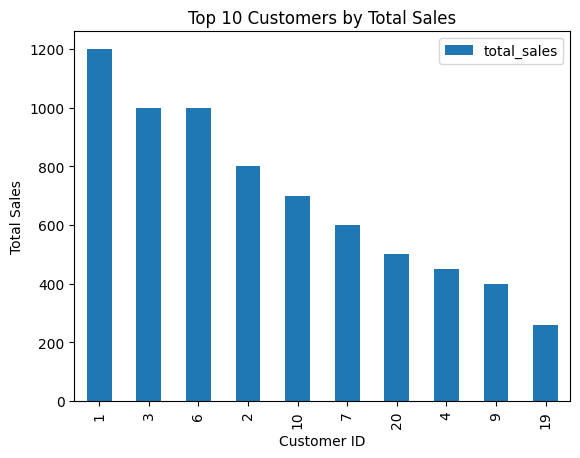

In [63]:
top_customers.head(10).plot(x = 'customer_id', y = 'total_sales', kind = 'bar')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.show()

- Histogram of Purchase Frequency:

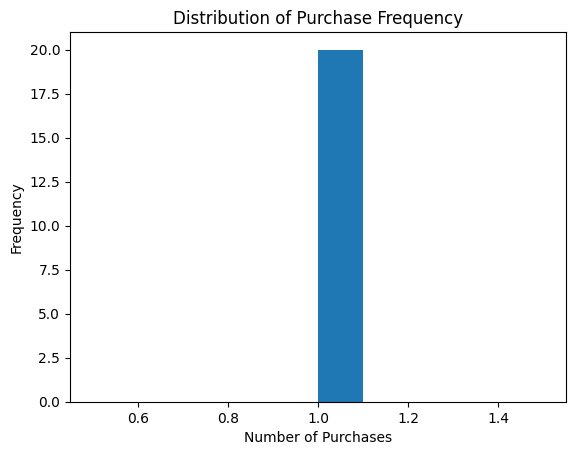

In [64]:
plt.hist(customer_analysis_df['purchase_count'], bins = 10)
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()

- Scatter Plot of Average Purchase Value vs. Total Sales:


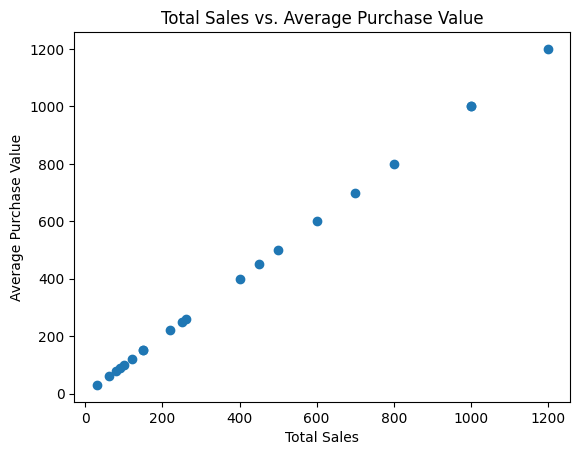

In [65]:
plt.scatter(customer_analysis_df['total_sales'], customer_analysis_df['avg_purchase_value'])
plt.title('Total Sales vs. Average Purchase Value')
plt.xlabel('Total Sales')
plt.ylabel('Average Purchase Value')
plt.show()